In [80]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import seaborn as sns

SMALL_SIZE, MEDIUM_SIZE, LARGE_SIZE, TITLE_SIZE = 8, 10, 12, 14
plt.rc('font', size=LARGE_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=TITLE_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=LARGE_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=LARGE_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=LARGE_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=LARGE_SIZE)    # legend fontsize
plt.rc('figure', titlesize=TITLE_SIZE)  # fontsize of the figure title

In [72]:
# Read pickled data into DataFrames
with open(f"pickleFiles/Trimmed.pickle", 'rb') as f: fracDimDF = pickle.load(f)
fracDimDF.drop(columns=['NPshape', 'NPname', 'NPtemp', 'orderRank'], inplace=True)
AuPd20CUL10_df = fracDimDF.loc[fracDimDF.index[:101]]
AuPd30CURAL_df = fracDimDF.loc[fracDimDF.index[101:202]]
AuPd30ICRCS_df = fracDimDF.loc[fracDimDF.index[202:303]]
AuPt40CORCS_df = fracDimDF.loc[fracDimDF.index[303:404]]
AuPt40ICRCS_df = fracDimDF.loc[fracDimDF.index[404:505]]
CoPd40TOL12_df = fracDimDF.loc[fracDimDF.index[505:606]]
MNP_df = fracDimDF.loc[fracDimDF.index[606:645]]
PtAu20THL12_df = fracDimDF.loc[fracDimDF.index[645:746]]

BNPdfs = {'AuPd20CUL10': AuPd20CUL10_df, 'AuPd30CURAL': AuPd30CURAL_df, 'AuPd30ICRCS': AuPd30ICRCS_df, 'AuPt40CORCS': AuPt40CORCS_df, 
          'AuPt40ICRCS': AuPt40ICRCS_df, 'CoPd40TOL12': CoPd40TOL12_df, 'PtAu20THL12': PtAu20THL12_df}

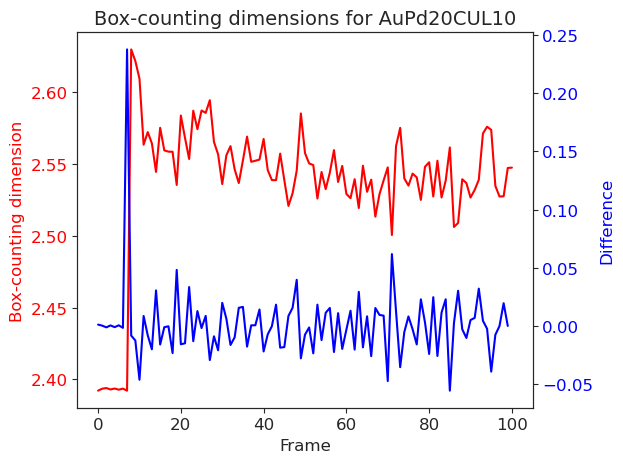

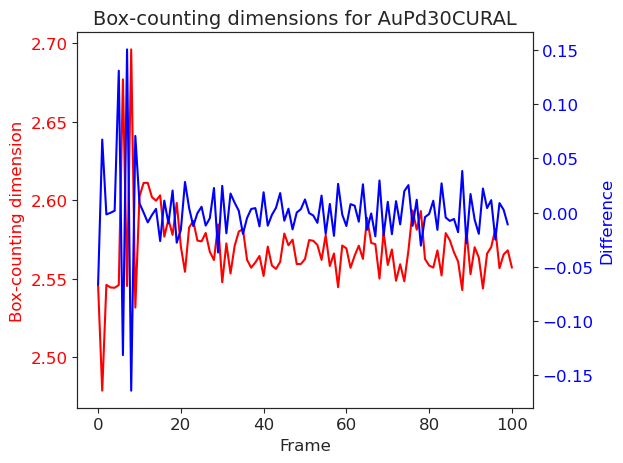

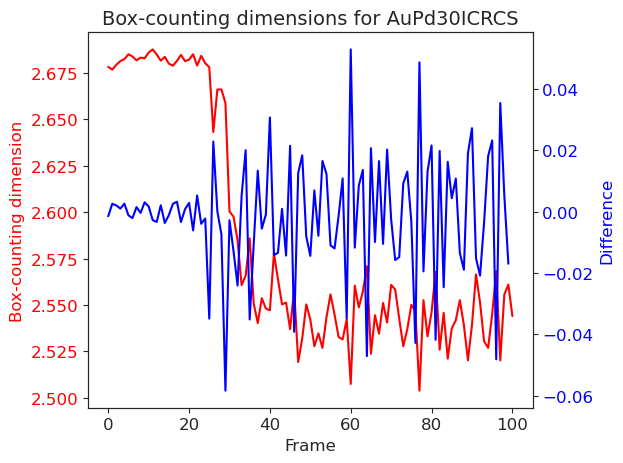

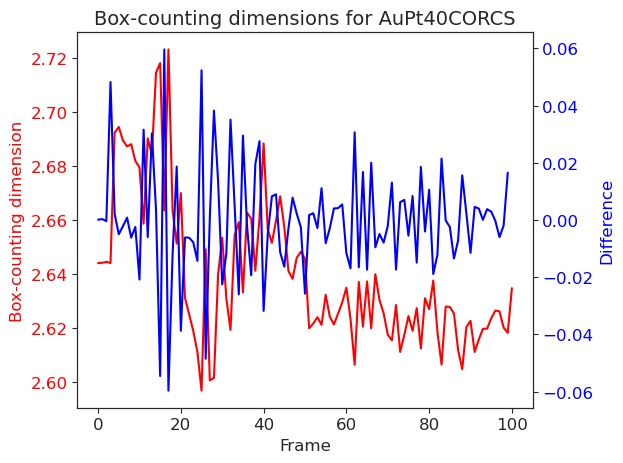

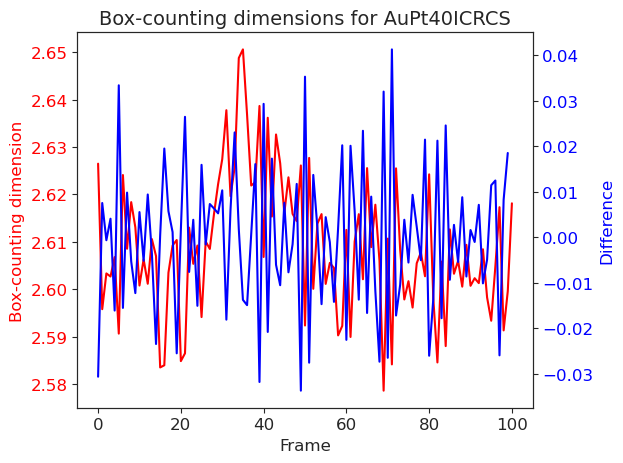

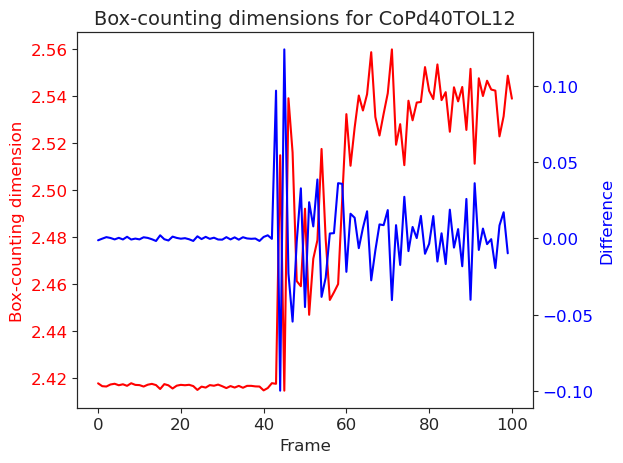

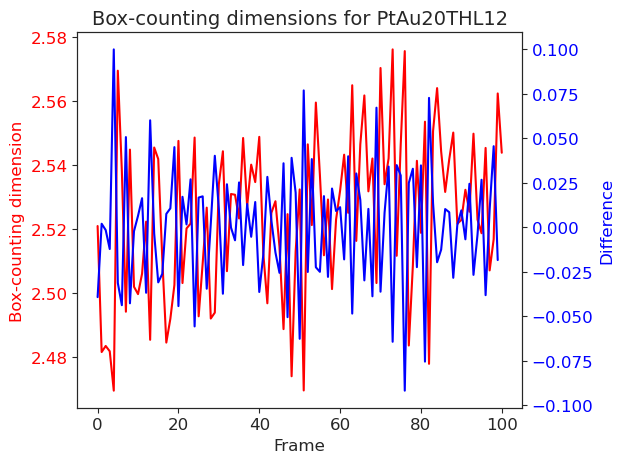

In [81]:
def plotTrajBoxCntDims(boxCntDimSeries, npName):
    sns.set_style('ticks')
    boxCntDimDiffs = boxCntDimSeries[1:].array - boxCntDimSeries[:-1].array
    
    fig, ax1 = plt.subplots()
    ax1.plot(range(len(boxCntDimSeries)), boxCntDimSeries.array, color='r')
    ax1.set_xlabel('Frame')
    ax1.set_ylabel('Box-counting dimension', color='r')
    ax1.tick_params(axis='y', labelcolor='r')
    ax1.grid(False)
    ax2 = ax1.twinx() 
    ax2.grid(False)
    ax2.plot(range(len(boxCntDimDiffs)), boxCntDimDiffs, color='b')
    ax2.set_ylabel('Difference', color='b')
    ax2.tick_params(axis='y', labelcolor='b')
    plt.title(f"Box-counting dimensions for {npName}")
    fig.tight_layout()
    plt.savefig(f"BNPtrajBoxCntDims/{npName}_trajBoxCntDims.png", dpi=300)
    plt.show()

# plotTrajBoxCntDims(AuPd20CUL10_df.iloc[:, 0], 'AuPd20CUL10')
for npName in BNPdfs: plotTrajBoxCntDims(BNPdfs[npName].iloc[:, 0], npName)

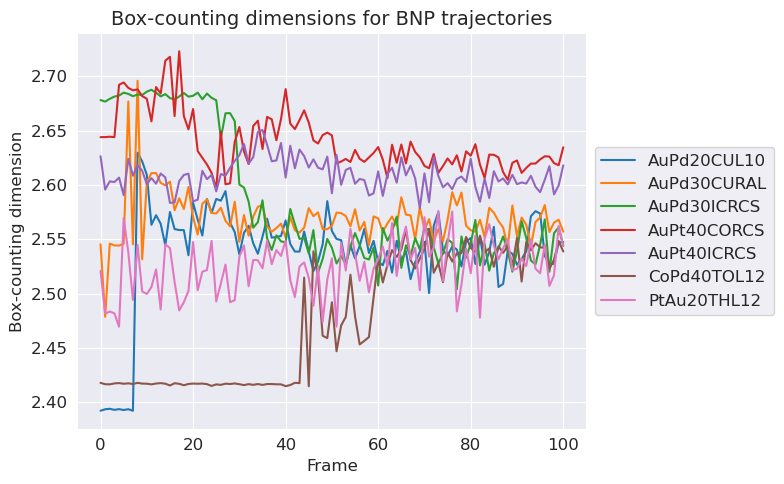

In [83]:
sns.set_style('darkgrid')
fig = plt.figure(figsize=(8, 5))
ax = plt.subplot(111)
for npName in BNPdfs: 
    ax.plot(range(len(BNPdfs[npName])), BNPdfs[npName].iloc[:, 0].array, label=npName)
plt.xlabel('Frame')
plt.ylabel('Box-counting dimension')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title(f"Box-counting dimensions for BNP trajectories")
plt.tight_layout()
plt.savefig(f"BNPtrajBoxCntDims/BNPtrajBoxCntDims.png", dpi=300)
plt.show()

## Time Complexity Analysis for Algorithms Measuring Metallic Nanoparticles Similarities

In [102]:
numAtoms, numSurfAtoms, rmsdTimes, rdfTimes, boxCntDimTimes = [], [], [], [], []
for npName in BNPdfs: 
    BNPdf = pickle.load(open(f"pickleFiles/{npName}_filtRedund.pickle", 'rb'))
    numAtoms.extend(BNPdf['numAtom1s'][0])
    numSurfAtoms.extend(BNPdf['numSurfAtom1s'][0])
    rmsdTimes.extend(BNPdf['eucTs'][0])
    rdfTimes.extend(BNPdf['rdfTs'][0])
    boxCntDimTimes.extend(BNPdf['bcdT1s'][0])
sns.set_style('darkgrid')

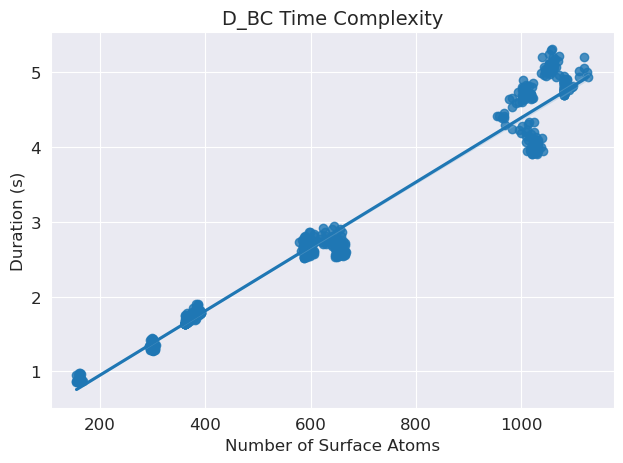

In [103]:
# Box-counting dimension
sns.regplot(x=numSurfAtoms, y=boxCntDimTimes, label='D_BC')
plt.xlabel('Number of Surface Atoms')
plt.ylabel('Duration (s)')
plt.title('D_BC Time Complexity')
plt.tight_layout()
plt.savefig(f"timeComplexityFigs/BoxCntDimTimeComplexity.png", dpi=300)
plt.show()

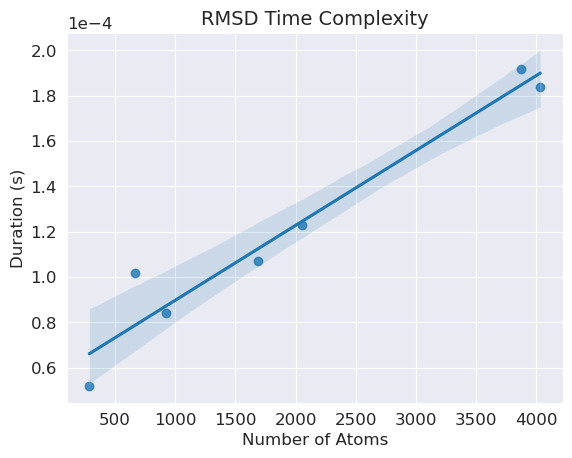

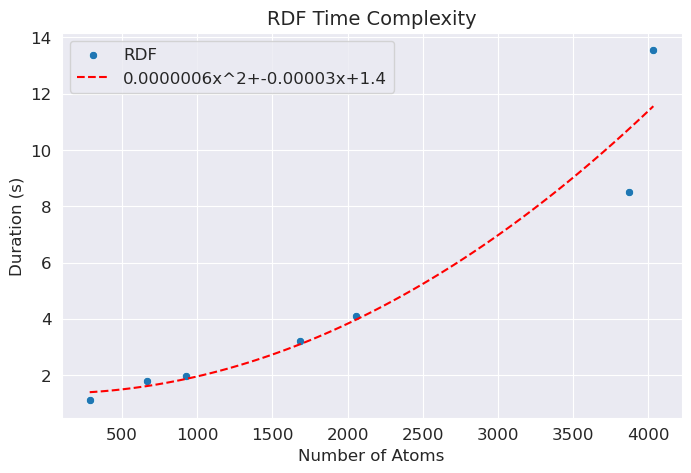

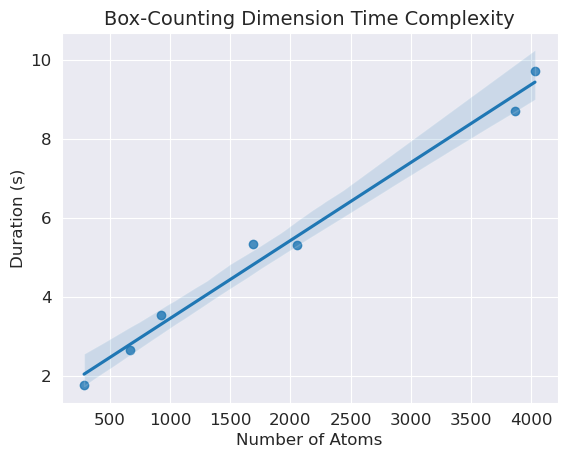

In [104]:
# Averaged over all atoms
atomNums = [286, 665, 923, 1687, 2057, 3871, 4033]
rmsdTime = [0.000052, 0.000102, 0.000084, 0.000107, 0.000123, 0.000192, 0.000184]
rdfTime = [1.107191, 1.775634, 1.961305, 3.222374, 4.110994, 8.516526, 13.544919]
boxCntDimTime = [1.773275, 2.667095, 3.559272, 5.339762, 5.324503, 8.700466, 9.730599]

# RMSD should show O(n^2) if n is large enough -- To be omitted
sns.regplot(x=atomNums, y=rmsdTime, label='RMSD')
plt.ticklabel_format(axis='y', style='sci', scilimits=(-2, 0))
plt.xlabel('Number of Atoms')
plt.ylabel('Duration (s)')
plt.title('RMSD Time Complexity')
plt.savefig(f"timeComplexityFigs/RMSDtimeComplexity.png", dpi=300)
plt.show()

coefs = np.polyfit(atomNums, rdfTime, 2)
polynomialFunc = np.poly1d(coefs)
extrapolatedAtomNum = np.linspace(min(atomNums), max(atomNums), 100)
fig = plt.figure(figsize=(8, 5))
ax = plt.subplot(111)
sns.scatterplot(x=atomNums, y=rdfTime, label='RDF')
ax.plot(extrapolatedAtomNum, polynomialFunc(extrapolatedAtomNum), 'r--', label=f"{coefs[0]:.7f}x^2+{coefs[1]:.5f}x+{coefs[2]:.1f}")
plt.xlabel('Number of Atoms')
plt.ylabel('Duration (s)')
ax.legend(loc='upper left')
plt.title('RDF Time Complexity')
plt.savefig(f"timeComplexityFigs/RDFtimeComplexity.png", dpi=300)
plt.show()

sns.regplot(x=atomNums, y=boxCntDimTime, label='D_BC')
plt.xlabel('Number of Atoms')
plt.ylabel('Duration (s)')
plt.title('Box-Counting Dimension Time Complexity')
plt.savefig(f"timeComplexityFigs/BCDtimeComplexityAvg.png", dpi=300)
plt.show()